# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


In [93]:
cities

['kruisfontein',
 'cabo san lucas',
 'hawaiian paradise park',
 'kodiak',
 "starobil's'k",
 'saint-philippe',
 'puerto natales',
 'west island',
 'alto araguaia',
 'bethel',
 'fisterra',
 'guarapari',
 'iqaluit',
 'adamstown',
 'ushuaia',
 'grytviken',
 'saipan',
 'terrace',
 'pavilosta',
 'albany',
 'dudinka',
 'tiksi',
 'uturoa',
 'puerto baquerizo moreno',
 'port-aux-francais',
 'luderitz',
 'olonkinbyen',
 'nova vicosa',
 'lebu',
 'portland',
 'hamilton',
 'cozumel',
 'yangambi',
 'kununurra',
 'blackmans bay',
 "port saint john's",
 'ribeira grande',
 'el alto',
 'ad dabbah',
 'whitehorse',
 'college',
 'bilibino',
 'qaqortoq',
 'east london',
 'port moresby',
 "hayma'",
 'bredasdorp',
 'ust-nera',
 'eguilles',
 'stanley',
 'taroa',
 'edinburgh of the seven seas',
 'yarmouth',
 'anadyr',
 'longyearbyen',
 'cartagena',
 'atafu village',
 'afaahiti',
 'nova sintra',
 'jamestown',
 'vorgashor',
 'papatowai',
 'koryazhma',
 'isafjordur',
 'flying fish cove',
 'haiku-pauwela',
 'satipo

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:600]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # sleep
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | starobil's'k
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | alto araguaia
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | fisterra
Processing Record 12 of Set 1 | guarapari
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | terrace
Processing Record 19 of Set 1 | pavilosta
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | tiksi
Processing

Processing Record 38 of Set 4 | hawkesbury
Processing Record 39 of Set 4 | tezu
Processing Record 40 of Set 4 | pasni
Processing Record 41 of Set 4 | isetskoye
Processing Record 42 of Set 4 | batticaloa
Processing Record 43 of Set 4 | choma
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | margaret river
Processing Record 46 of Set 4 | illizi
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | ghat
Processing Record 49 of Set 4 | muzayri'
City not found. Skipping...
Processing Record 0 of Set 5 | prado
Processing Record 1 of Set 5 | nagqu
Processing Record 2 of Set 5 | udachny
Processing Record 3 of Set 5 | tralee
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | jindabyne
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | lazaro cardenas
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | isangel
Processing Record 10 of Set 5 | kourou
Processing Record 11 of Set 5 | baly

Processing Record 31 of Set 8 | salaqi
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | ca mau
Processing Record 34 of Set 8 | mboursou lere
Processing Record 35 of Set 8 | acarau
Processing Record 36 of Set 8 | ross'
City not found. Skipping...
Processing Record 37 of Set 8 | carsamba
Processing Record 38 of Set 8 | atar
Processing Record 39 of Set 8 | usinsk
Processing Record 40 of Set 8 | sanibel
Processing Record 41 of Set 8 | baiti
Processing Record 42 of Set 8 | ta`u
Processing Record 43 of Set 8 | general pico
Processing Record 44 of Set 8 | bandarbeyla
Processing Record 45 of Set 8 | leava
Processing Record 46 of Set 8 | tazacorte
Processing Record 47 of Set 8 | ruidoso
Processing Record 48 of Set 8 | kapa'a
Processing Record 49 of Set 8 | tura
Processing Record 0 of Set 9 | mournies
Processing Record 1 of Set 9 | kencong
Processing Record 2 of Set 9 | nuuk
Processing Record 3 of Set 9 | beau vallon
Processing Record 4 of Set 9 | midvagur
Processing Record 

-----------------------------
Data Retrieval Complete      
-----------------------------


In [95]:
rows = []

# loop cities
for city in cities[0:30]:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)

                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": wind_speed,
                              "cloudiness": cloudiness,
                              "date": date}

            #             print(row)
                        rows.append(row)

                    else:
                        print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
                        print(weather_data)
                else:
                    print("failed to extract lat and lon from response")
                    print(geo_data)
            else:
                print(f"did not find any geolocation data for city: {city}")
        else:
            print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
            print(geo_data)
    except Exception as e:
        print(f"Something went terribly wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

kruisfontein was processed successfully.
cabo san lucas was processed successfully.
hawaiian paradise park was processed successfully.
kodiak was processed successfully.
did not find any geolocation data for city: starobil's'k
starobil's'k was processed successfully.
saint-philippe was processed successfully.
puerto natales was processed successfully.
west island was processed successfully.
alto araguaia was processed successfully.
bethel was processed successfully.
fisterra was processed successfully.
guarapari was processed successfully.
iqaluit was processed successfully.
adamstown was processed successfully.
ushuaia was processed successfully.
grytviken was processed successfully.
saipan was processed successfully.
terrace was processed successfully.
pavilosta was processed successfully.
albany was processed successfully.
dudinka was processed successfully.
tiksi was processed successfully.
uturoa was processed successfully.
puerto baquerizo moreno was processed successfully.
port-

In [96]:
df = pd.DataFrame(rows)
df

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Kruisfontein,ZA,-34.011956,24.743330,59.00,1018,88,1685475136,100,1685475136
1,Cabo San Lucas,MX,22.893888,-109.920060,84.34,1013,42,1685474647,0,1685474647
2,Hawaiian Paradise Park,US,19.585022,-154.973145,74.30,1018,86,1685475139,100,1685475139
3,Kodiak,US,57.790000,-152.407222,47.71,1008,71,1685475141,0,1685475141
4,Saint-Philippe,CA,45.358450,-73.479005,80.89,1019,34,1685475143,0,1685475143
5,Puerto Natales,CL,-51.726200,-72.505998,55.98,984,62,1685475145,20,1685475145
6,West Island,AU,-12.145866,96.842275,82.45,1012,78,1685475146,40,1685475146
7,Alto Araguaia,BR,-17.315653,-53.216937,69.08,1015,80,1685475148,100,1685475148
8,Bethel,US,60.792222,-161.755833,37.74,1005,93,1685474880,100,1685474880
9,Fisterra,ES,42.906477,-9.263789,63.52,1018,91,1685475151,92,1685475151


In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [98]:
# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Kruisfontein,ZA,-34.011956,24.743330,59.00,1018,88,1685475136,100,1685475136
1,Cabo San Lucas,MX,22.893888,-109.920060,84.34,1013,42,1685474647,0,1685474647
2,Hawaiian Paradise Park,US,19.585022,-154.973145,74.30,1018,86,1685475139,100,1685475139
3,Kodiak,US,57.790000,-152.407222,47.71,1008,71,1685475141,0,1685475141
4,Saint-Philippe,CA,45.358450,-73.479005,80.89,1019,34,1685475143,0,1685475143


In [99]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [100]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,58.15,89,100,1.32,ZA,1685473935
1,cabo san lucas,22.8909,-109.9124,84.54,42,0,6.91,MX,1685473551
2,hawaiian paradise park,19.5933,-154.9731,74.91,87,100,0.00,US,1685473986
3,kodiak,57.7900,-152.4072,47.71,71,0,8.05,US,1685473630
4,starobil's'k,49.2783,38.9107,57.72,95,90,5.10,UA,1685474383


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

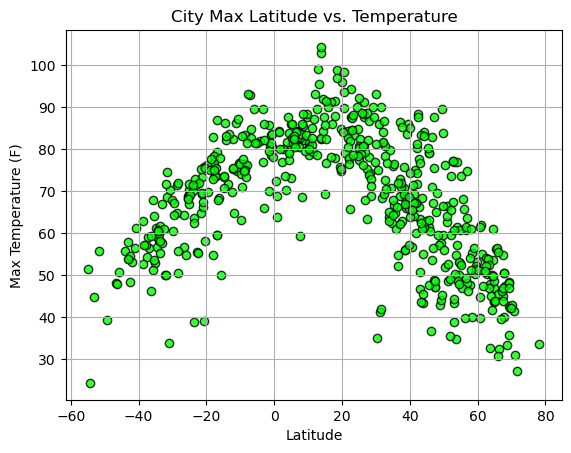

In [101]:
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="lime",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)


plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.savefig("output_data/Fig1.png")


plt.show()

#### Latitude Vs. Humidity

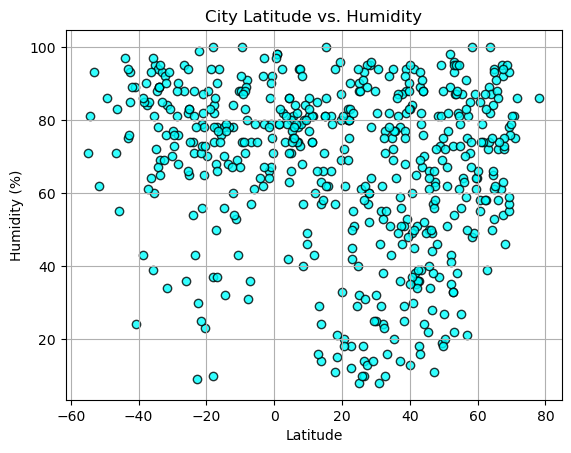

In [102]:
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="aqua",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


plt.savefig("output_data/Fig2.png")


plt.show()

#### Latitude Vs. Cloudiness

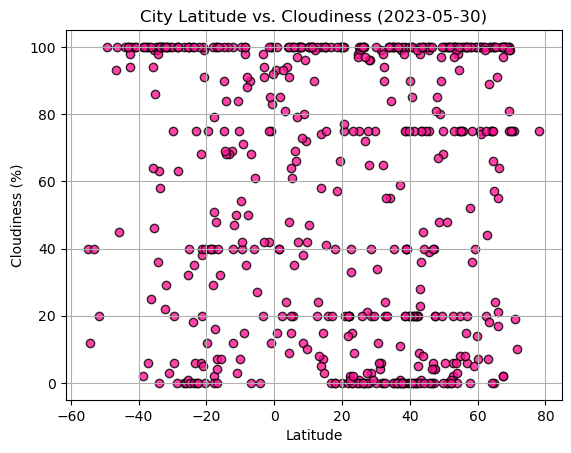

In [103]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="deeppink",
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

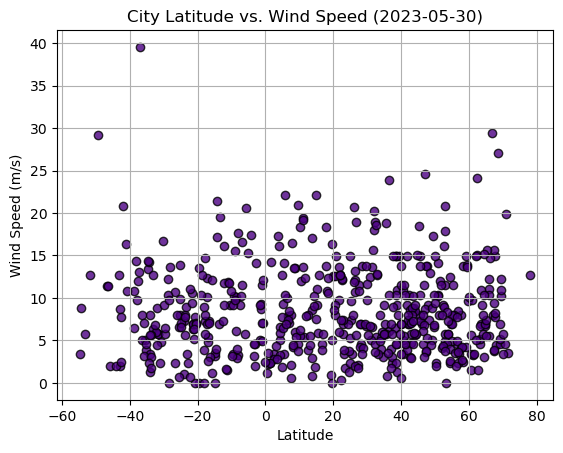

In [104]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    color="indigo",
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,cabo san lucas,22.8909,-109.9124,84.54,42,0,6.91,MX,1685473551
2,hawaiian paradise park,19.5933,-154.9731,74.91,87,100,0.00,US,1685473986
3,kodiak,57.7900,-152.4072,47.71,71,0,8.05,US,1685473630
4,starobil's'k,49.2783,38.9107,57.72,95,90,5.10,UA,1685474383
9,bethel,41.3712,-73.4140,69.24,45,0,4.61,US,1685474389


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,58.15,89,100,1.32,ZA,1685473935
5,saint-philippe,-21.3585,55.7679,69.39,79,38,6.38,RE,1685474384
6,puerto natales,-51.7236,-72.4875,55.85,62,20,12.66,CL,1685474386
7,west island,-12.1568,96.8225,82.38,78,40,16.11,CC,1685474387
8,alto araguaia,-17.3147,-53.2153,73.60,68,100,10.11,BR,1685474388


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.584141814789143


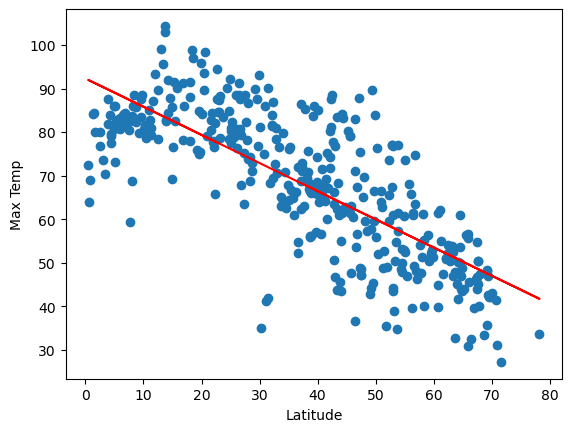

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.6118769226043319


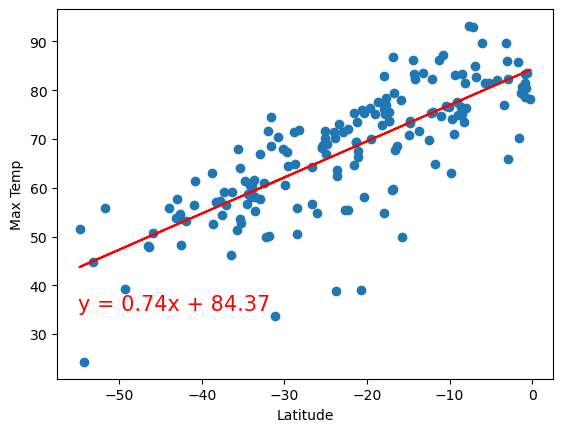

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** Both R values for north and south are about .5 showing a strong correlation between Max Temperature and Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00035070776643274693


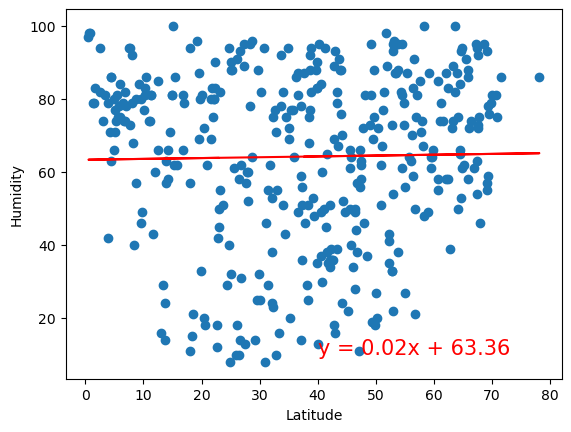

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.011423888146843865


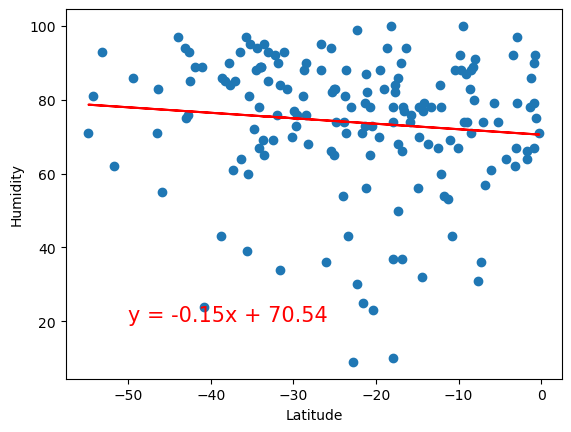

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** Both R values are below .5 so which shows there is no strong correlation with humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0017518724856312687


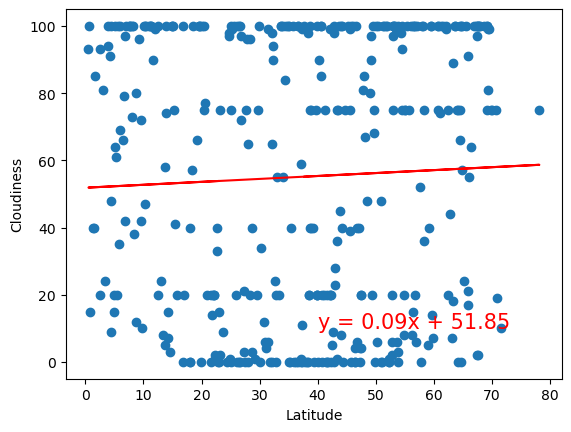

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.014590485680123543


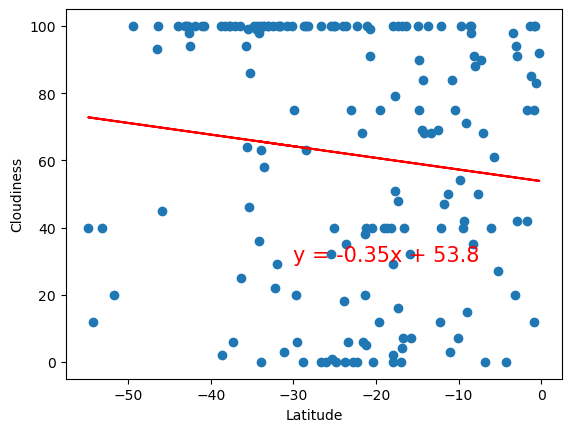

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** Both R values are below .5 so which shows there is no strong correlation with clouds and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0004111759994167767


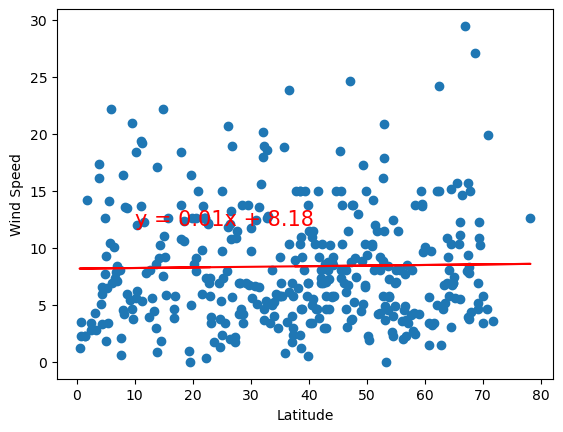

In [114]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.001280408165575702


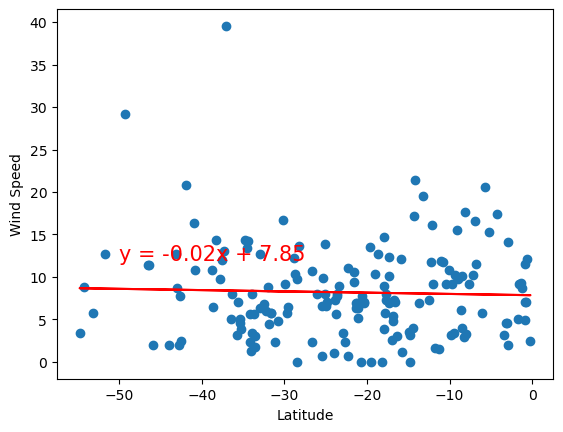

In [115]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** Both R values are below .5 so which shows there is no strong correlation with wind speed and latitude.